In [1]:
import pandas as pd
import numpy as np

In [43]:
dgi = pd.read_table("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/dgidb/dgidb_drug_gene_interactions.txt")

In [141]:
egen = pd.read_table("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/dgidb/druggable_gene_tsvs/Entrez_GENES.tsv")

In [75]:
target_sequence = pd.read_table("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/protein_seq.txt")

In [44]:
drugbank = pd.read_table("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/drug_set.txt", header=None)
drugbank = drugbank.rename(columns = {0:'DrugBank_ID', 1:'Drug_Name', 2:'InChI', 3:'SMILES', 4:'State'})
drugbank.head(1)

,DrugBank_ID,Drug_Name,InChI,SMILES,State
0,DB00006,Bivalirudin,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,approved


In [45]:
asso = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/1_gold_learning_asso.tsv")

In [142]:
dgi.head(2)

,entrez_gene_symbol,gene_long_name,interaction_claim_source,interaction_types,drug_name,drug_primary_name
0,HDAC10,histone deacetylase 10,TALC,inhibitor,DACINOSTAT,DACINOSTAT
1,HDAC10,histone deacetylase 10,TALC,inhibitor,VORINOSTAT,VORINOSTAT


In [143]:
egen.head(2)

,entrez_id,entrez_gene_symbol,entrez_gene_synonyms,ensembl_ids
0,57573,ZNF471,"ERP1,Z1971",ENSG00000196263
1,8563,THOC5,"C22orf19,Fmip,PK1.3,fSAP79",ENSG00000100296


In [47]:
gdr = drugbank[drugbank.DrugBank_ID.isin(asso.drug_id)]

In [153]:
merged = pd.merge(left=gdr, right=dgi, left_on = 'DrugBank_ID', right_on='drug_name').drop_duplicates()

In [157]:
fi_merged =  pd.merge(left=merged, right=egen)

In [158]:
print len(fi_merged), len(fi_merged.drop_duplicates())
print len(fi_merged.DrugBank_ID.drop_duplicates())
fi_merged.head(2)

1965 1965
434


,DrugBank_ID,Drug_Name,InChI,SMILES,State,entrez_gene_symbol,gene_long_name,interaction_claim_source,interaction_types,drug_name,drug_primary_name,entrez_id,entrez_gene_synonyms,ensembl_ids
0,DB00114,Pyridoxal Phosphate,InChI=1S/C8H10NO6P/c1-5-8(11)7(3-10)6(2-9-5)4-...,CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O,nutraceutical,GAD1,"glutamate decarboxylase 1 (brain, 67kDa)",DrugBank,cofactor,DB00114,PYRIDOXAL PHOSPHATE,2571,"CPSQ1,GAD,SCP",ENSG00000128683
1,DB00114,Pyridoxal Phosphate,InChI=1S/C8H10NO6P/c1-5-8(11)7(3-10)6(2-9-5)4-...,CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O,nutraceutical,BCAT2,"branched chain amino-acid transaminase 2, mito...",DrugBank,cofactor,DB00114,PYRIDOXAL PHOSPHATE,587,"BCAM,BCATM,BCT2,PP18",ENSG00000105552


In [183]:
fi_merged.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/gold_gene.tsv", sep='\t', index=False)
fi_merged.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/new_predict/gold_gene.tsv", sep='\t', index=False)

In [63]:
indep = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/3_indep_learning_asso.tsv")

In [167]:
indep_gene = dgi[dgi.drug_name.isin(indep.drug_id)].drop_duplicates()

In [173]:
print len(indep_gene), len(indep_gene.drop_duplicates())
print len(indep_gene.drug_name.drop_duplicates())
indep_gene.head(2)

276 276
71


,entrez_gene_symbol,gene_long_name,interaction_claim_source,interaction_types,drug_name,drug_primary_name
100,PGR,progesterone receptor,DrugBank,agonist,DB00588,FLUTICASONE PROPIONATE
115,PGR,progesterone receptor,DrugBank,agonist,DB00421,SPIRONOLACTONE


In [179]:
fi_merged2 =  pd.merge(left=indep_gene, right=egen)

In [180]:
print len(fi_merged2), len(fi_merged2.drop_duplicates())
print len(fi_merged2.drug_name.drop_duplicates())
fi_merged2.head(2)

276 276
71


,entrez_gene_symbol,gene_long_name,interaction_claim_source,interaction_types,drug_name,drug_primary_name,entrez_id,entrez_gene_synonyms,ensembl_ids
0,PGR,progesterone receptor,DrugBank,agonist,DB00588,FLUTICASONE PROPIONATE,5241,"NR3C3,PR",ENSG00000082175
1,PGR,progesterone receptor,DrugBank,agonist,DB00421,SPIRONOLACTONE,5241,"NR3C3,PR",ENSG00000082175


In [208]:
fi_merged2.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/indep_gene.tsv", sep='\t', index=False)
fi_merged2.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/new_predict/indep_gene.tsv", sep='\t', index=False)

In [ ]:
##### drug의 target 정리

In [79]:
drug_target = pd.read_table("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/human2.txt", header=None)
target_sequence = pd.read_table("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/protein_seq.txt")

In [80]:
drug_target = drug_target.rename(columns={0:'DrugBank_ID', 1:'Target'})
print len(drug_target)
drug_target.head(2)

10764


,DrugBank_ID,Target
0,DB00114,P19113
1,DB00117,P19113


In [81]:
print len(target_sequence)
target_sequence.head(2)

2290


,Entry,Sequence,Length
0,P19113,MMEPEEYRERGREMVDYICQYLSTVRERRVTPDVQPGYLRAQLPES...,662.0
1,Q9UI32,MRSMKALQKALSRAGSHCGRGGWGHPSRSPLLGGGVRHHLSEAAAQ...,602.0


In [121]:
drug_seq = pd.merge(left=drug_target, right=target_sequence, left_on='Target', right_on='Entry').drop_duplicates()
print len(drug_seq)
drug_seq.head(2)

10577


,DrugBank_ID,Target,Entry,Sequence,Length
0,DB00114,P19113,P19113,MMEPEEYRERGREMVDYICQYLSTVRERRVTPDVQPGYLRAQLPES...,662.0
1,DB00117,P19113,P19113,MMEPEEYRERGREMVDYICQYLSTVRERRVTPDVQPGYLRAQLPES...,662.0


In [122]:
len(gdr.DrugBank_ID)

434

In [123]:
# gold drug의 target들
gold_target = drug_seq[drug_seq.DrugBank_ID.isin(gdr.DrugBank_ID)]
print len(gold_target.DrugBank_ID.drop_duplicates())
print len(gold_target)
gold_target.head(1)

434
2246


,DrugBank_ID,Target,Entry,Sequence,Length
0,DB00114,P19113,P19113,MMEPEEYRERGREMVDYICQYLSTVRERRVTPDVQPGYLRAQLPES...,662.0


In [124]:
# indep drug의 target들
indep_target = drug_seq[drug_seq.DrugBank_ID.isin(indep.drug_id)]
print len(indep_target.DrugBank_ID.drop_duplicates())
print len(indep_target)
indep_target.head(1)

71
317


,DrugBank_ID,Target,Entry,Sequence,Length
5,DB00125,P35228,P35228,MACPWKFLFKTKFHQYAMNGEKDINNNVEKAPCATSSPVTQDDLQY...,1153.0


In [125]:
gold_indep_target = pd.concat([indep_target, gold_target], axis=0).drop_duplicates()
print len(gold_indep_target)

2309


In [127]:
print len(gold_target), print len(indep_target), print len(gold_indep_target)

SyntaxError: invalid syntax (<ipython-input-127-8e4d1964fe9a>, line 1)

In [128]:
len(gold_indep_target[~gold_indep_target.DrugBank_ID.isin(gold_target.DrugBank_ID)].drop_duplicates())

63

In [129]:
gold_indep_target.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/drug_target_seq.tsv", sep='\t', index=False)

In [130]:
import scipy.io as sio

In [133]:
data = {
    'gold_indep_target_seq' : {
    'DrugBank_ID' : gold_indep_target['DrugBank_ID'].values,
    'Target': gold_indep_target['Target'].values,
    'Entry' : gold_indep_target['Entry'].values,
    'Sequence' : gold_indep_target['Sequence'].values,
    'Length' : gold_indep_target['Length'].values
        }
}

In [136]:
data = {
    'DrugBank_ID' : gold_indep_target['DrugBank_ID'].values,
    'Target': gold_indep_target['Target'].values,
    'Entry' : gold_indep_target['Entry'].values,
    'Sequence' : gold_indep_target['Sequence'].values,
    'Length' : gold_indep_target['Length'].values
}

In [137]:
sio.savemat("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/new_predict/drug_target_seq_mat2.mat", data)

In [197]:
a = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/1_drug_drug_se_sim_mat.tsv", index_col=0)
dr_id = a.columns.values.tolist()

In [202]:
h = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/1_gold_drug_id.tsv", header=None)

In [204]:
del a, dr_id, h

In [ ]:
### matlabe에서 계산한 target simialrity

In [241]:
targetSim = pd.read_excel("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/similarity_protein_gold_indep.xlsx", header=None)

In [243]:
targetSim.columns = gold_indep_target.Entry.tolist()
targetSim.index = gold_indep_target.Entry.tolist()

In [265]:
print len(targetSim)
print len(gold_indep_target.Entry)
targetSim.head(1)

2309
2309


,P35228,Q9P0X4,Q9P0X4,P00519,P00519,P23219,P23219,P23219,P23219,P21728,...,Q9UGJ0,Q9UGI9,Q14571,Q14573,Q14123,P51160,P16499,P35913,Q9Y698,Q92806
P35228,1.0,0.007301,0.007301,0.00921,0.00921,0.015303,0.015303,0.015303,0.015303,0.013242,...,0.012339,0.013388,0.005891,0.005685,0.013741,0.011477,0.012288,0.010557,0.015177,0.012273


In [271]:
targetSim1 = targetSim[~targetSim.index.duplicated()]

In [286]:
targetSim2 = targetSim1.loc[:, ~targetSim1.columns.duplicated()]

In [222]:
se = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/1_drug_drug_se_sim_mat.tsv", index_col=0)

In [245]:
gd = se.columns.values.tolist()

In [ ]:
targets

In [322]:
df = pd.DataFrame(columns=gd, index=gd)
df.fillna(0.0, inplace=True)

In [325]:
for i in gd:
    targets1 = gold_indep_target[gold_indep_target.DrugBank_ID == i].Target.tolist()
    for j in gd:
        targets2 = gold_indep_target[gold_indep_target.DrugBank_ID == j].Target.tolist()
        
        max_sim = targetSim2.filter(items = targets1, axis =0).filter(items=targets2).max().max()
        
        df.set_value(i, j, max_sim)

In [331]:
df.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/1_drug_drug_target_sim_mat.tsv", sep='\t')
df.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/new_predict/1_drug_drug_target_sim_mat.tsv", sep='\t')

In [332]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  1.58924000e+05,   1.23480000e+04,   5.21000000e+03,
          1.90000000e+02,   2.56000000e+02,   3.08000000e+02,
          1.38000000e+02,   1.60000000e+01,   6.00000000e+00,
          1.09600000e+04]),
 array([ 0.00381157,  0.10343042,  0.20304926,  0.3026681 ,  0.40228694,
         0.50190579,  0.60152463,  0.70114347,  0.80076231,  0.90038116,  1.        ]),
 <a list of 10 Patch objects>)

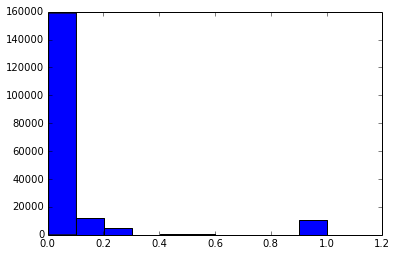

In [335]:
plt.hist(val)

In [ ]:
# indep drug-gold drug similarity

In [337]:
i_se = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/2_2_2_indep_drug_gold_drug_se_sim_mat.tsv", index_col=0)

In [339]:
idr = i_se.index.tolist()

In [341]:
df2 = pd.DataFrame(columns=gd, index=idr)
df2.fillna(0.0, inplace=True)

In [342]:
for i in idr:
    targets1 = gold_indep_target[gold_indep_target.DrugBank_ID == i].Target.tolist()
    for j in gd:
        targets2 = gold_indep_target[gold_indep_target.DrugBank_ID == j].Target.tolist()
        
        max_sim = targetSim2.filter(items = targets1, axis =0).filter(items=targets2).max().max()
        
        df2.set_value(i, j, max_sim)

In [351]:
df2.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/2_2_2_indep_drug_gold_drug_target_sim_mat.tsv", sep='\t')
df2.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/5_new_drug/new_predict/2_2_2_indep_drug_gold_drug_target_sim_mat.tsv", sep='\t')